<a href="https://colab.research.google.com/github/Nisha0202/Data-Analysis/blob/main/Dataset9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
import pandas as pd

# Load the .xlsx file
df = pd.read_excel('Iraqi Student Performance Prediction.xlsx')

# Print the first few rows of the DataFrame
print(df.head())

   Student_ID   Sex Social Status  Age Governorate Living Mother education  \
0           1  Male        single    2     baghdad   city        secondary   
1           2  Male        single    3     baghdad   city           medium   
2           3  Male        single    2     baghdad   city       Illiterate   
3           4  Male       coupled    3     baghdad   city               ba   
4           5  Male        single    2     baghdad   city        secondary   

  Father education Family member Education Father Alive  ... economy/bio  \
0        secondary                     yes          yes  ...          70   
1           higher                     yes          yes  ...          87   
2        secondary                      no          yes  ...          58   
3               ba                     yes          yes  ...          92   
4        secondary                     yes          yes  ...          60   

   Avg1 Islamea.1 arabic.1 english.1 math.1 physics.1 chemistry.1  \
0    

In [ ]:
#converting it to csv file

df.to_csv('myfile.csv', index=False)

In [ ]:
df

,Student_ID,Sex,Social Status,Age,Governorate,Living,Mother education,Father education,Family member Education,Father Alive,...,economy/bio,Avg1,Islamea2,arabic2,english2,math2,physics2,chemistry2,economy/bio2,Avg2
0,1,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,70,55,69,50,60,41,59,50,69,57
1,2,Male,single,3,baghdad,city,medium,higher,yes,yes,...,87,70,65,87,68,85,64,61,69,71
2,3,Male,single,2,baghdad,city,Illiterate,secondary,no,yes,...,58,54,44,50,46,45,55,30,43,45
3,4,Male,coupled,3,baghdad,city,ba,ba,yes,yes,...,92,73,60,55,60,55,70,73,80,65
4,5,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,60,34,40,32,28,25,35,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Female,single,2,baghdad,city,medium,secondary,yes,yes,...,97,90,75,75,89,69,75,86,89,80
116,117,Female,coupled,3,baghdad,city,medium,ba,yes,yes,...,70,56,65,65,80,45,39,49,65,58
117,118,Female,single,2,baghdad,city,medium,medium,no,no,...,84,67,54,69,74,76,69,40,84,67
118,119,Female,single,4,other,city,medium,secondary,yes,yes,...,63,78,63,61,63,75,69,67,73,67


In [ ]:
target_column_name = "Avg2" #taking second semester grades as targeted coloumn

In [ ]:
#categorical_target_column = True
categorical_target_column = False


**Observation**

Avg2 has lots of different numeric values so it's not categorical


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 120
Total Number of Columns : 56


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

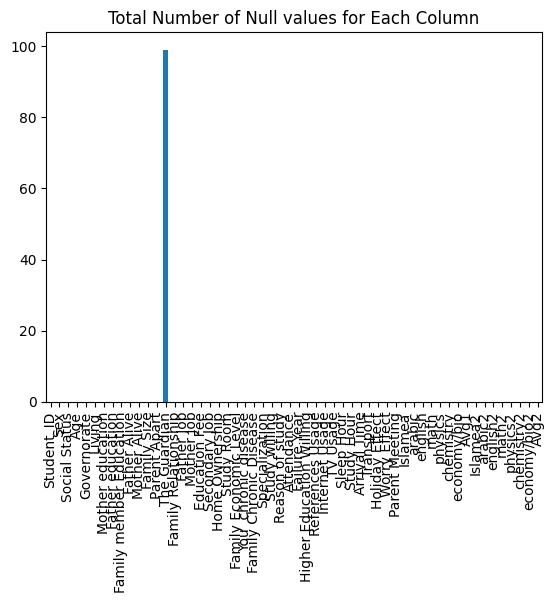

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


**Observation**

'The Gurdian' column has almost 100% null values

In [ ]:
droped_column_names = [ "Student_ID" , "Family member Education", "Mother Alive", "Father Alive", "Parent Apart", "Mother Job", "Father Job", "Secondary Job", "You  chronic disease", "Family Chronic Disease", "References Usage",  "Parent Meeting" ,
                       "TV Usage", "Internet Usage", "Islamea", "Islamea2", "arabic2" , "english2", "arabic", "english", "physics","physics2", "chemistry",  "chemistry2", "Arrival Time"]

df.drop( droped_column_names , axis = 1 ,inplace = True)


**Observation**

Tried to target only two subjects for analysis economy/bio and maths

In [ ]:
droped_column_names = [ "The Guardian", "Governorate"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
droped_column_names = [ "Family Size", "Home Ownership", "Reason of study", "Failure Year"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
df

,Sex,Social Status,Age,Living,Mother education,Father education,Family Relationship,Education Fee,Study Room,Family Economic Level,...,Study Hour,Transport,Holiday Effect,Worry Effect,math,economy/bio,Avg1,math2,economy/bio2,Avg2
0,Male,single,2,city,secondary,secondary,excellent,family,no,good,...,3,foot,yes,no,25,70,55,41,69,57
1,Male,single,3,city,medium,higher,excellent,family,yes,vgood,...,0,foot,yes,yes,59,87,70,85,69,71
2,Male,single,2,city,Illiterate,secondary,good,family,no,good,...,0,foot,yes,yes,45,58,54,45,43,45
3,Male,coupled,3,city,ba,ba,excellent,you,yes,vgood,...,1,foot,no,yes,68,92,73,55,80,65
4,Male,single,2,city,secondary,secondary,excellent,family,yes,vgood,...,1,foot,no,yes,15,60,34,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Female,single,2,city,medium,secondary,excellent,family,no,good,...,3,foot,no,yes,93,97,90,69,89,80
116,Female,coupled,3,city,medium,ba,vgood,family,no,good,...,3,foot,yes,yes,50,70,56,45,65,58
117,Female,single,2,city,medium,medium,excellent,family,no,good,...,3,foot,yes,yes,50,84,67,76,84,67
118,Female,single,4,city,medium,secondary,vgood,family,no,good,...,2,foot,yes,yes,100,63,78,75,73,67


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


**Observation**

100% data is unique(no duplication)

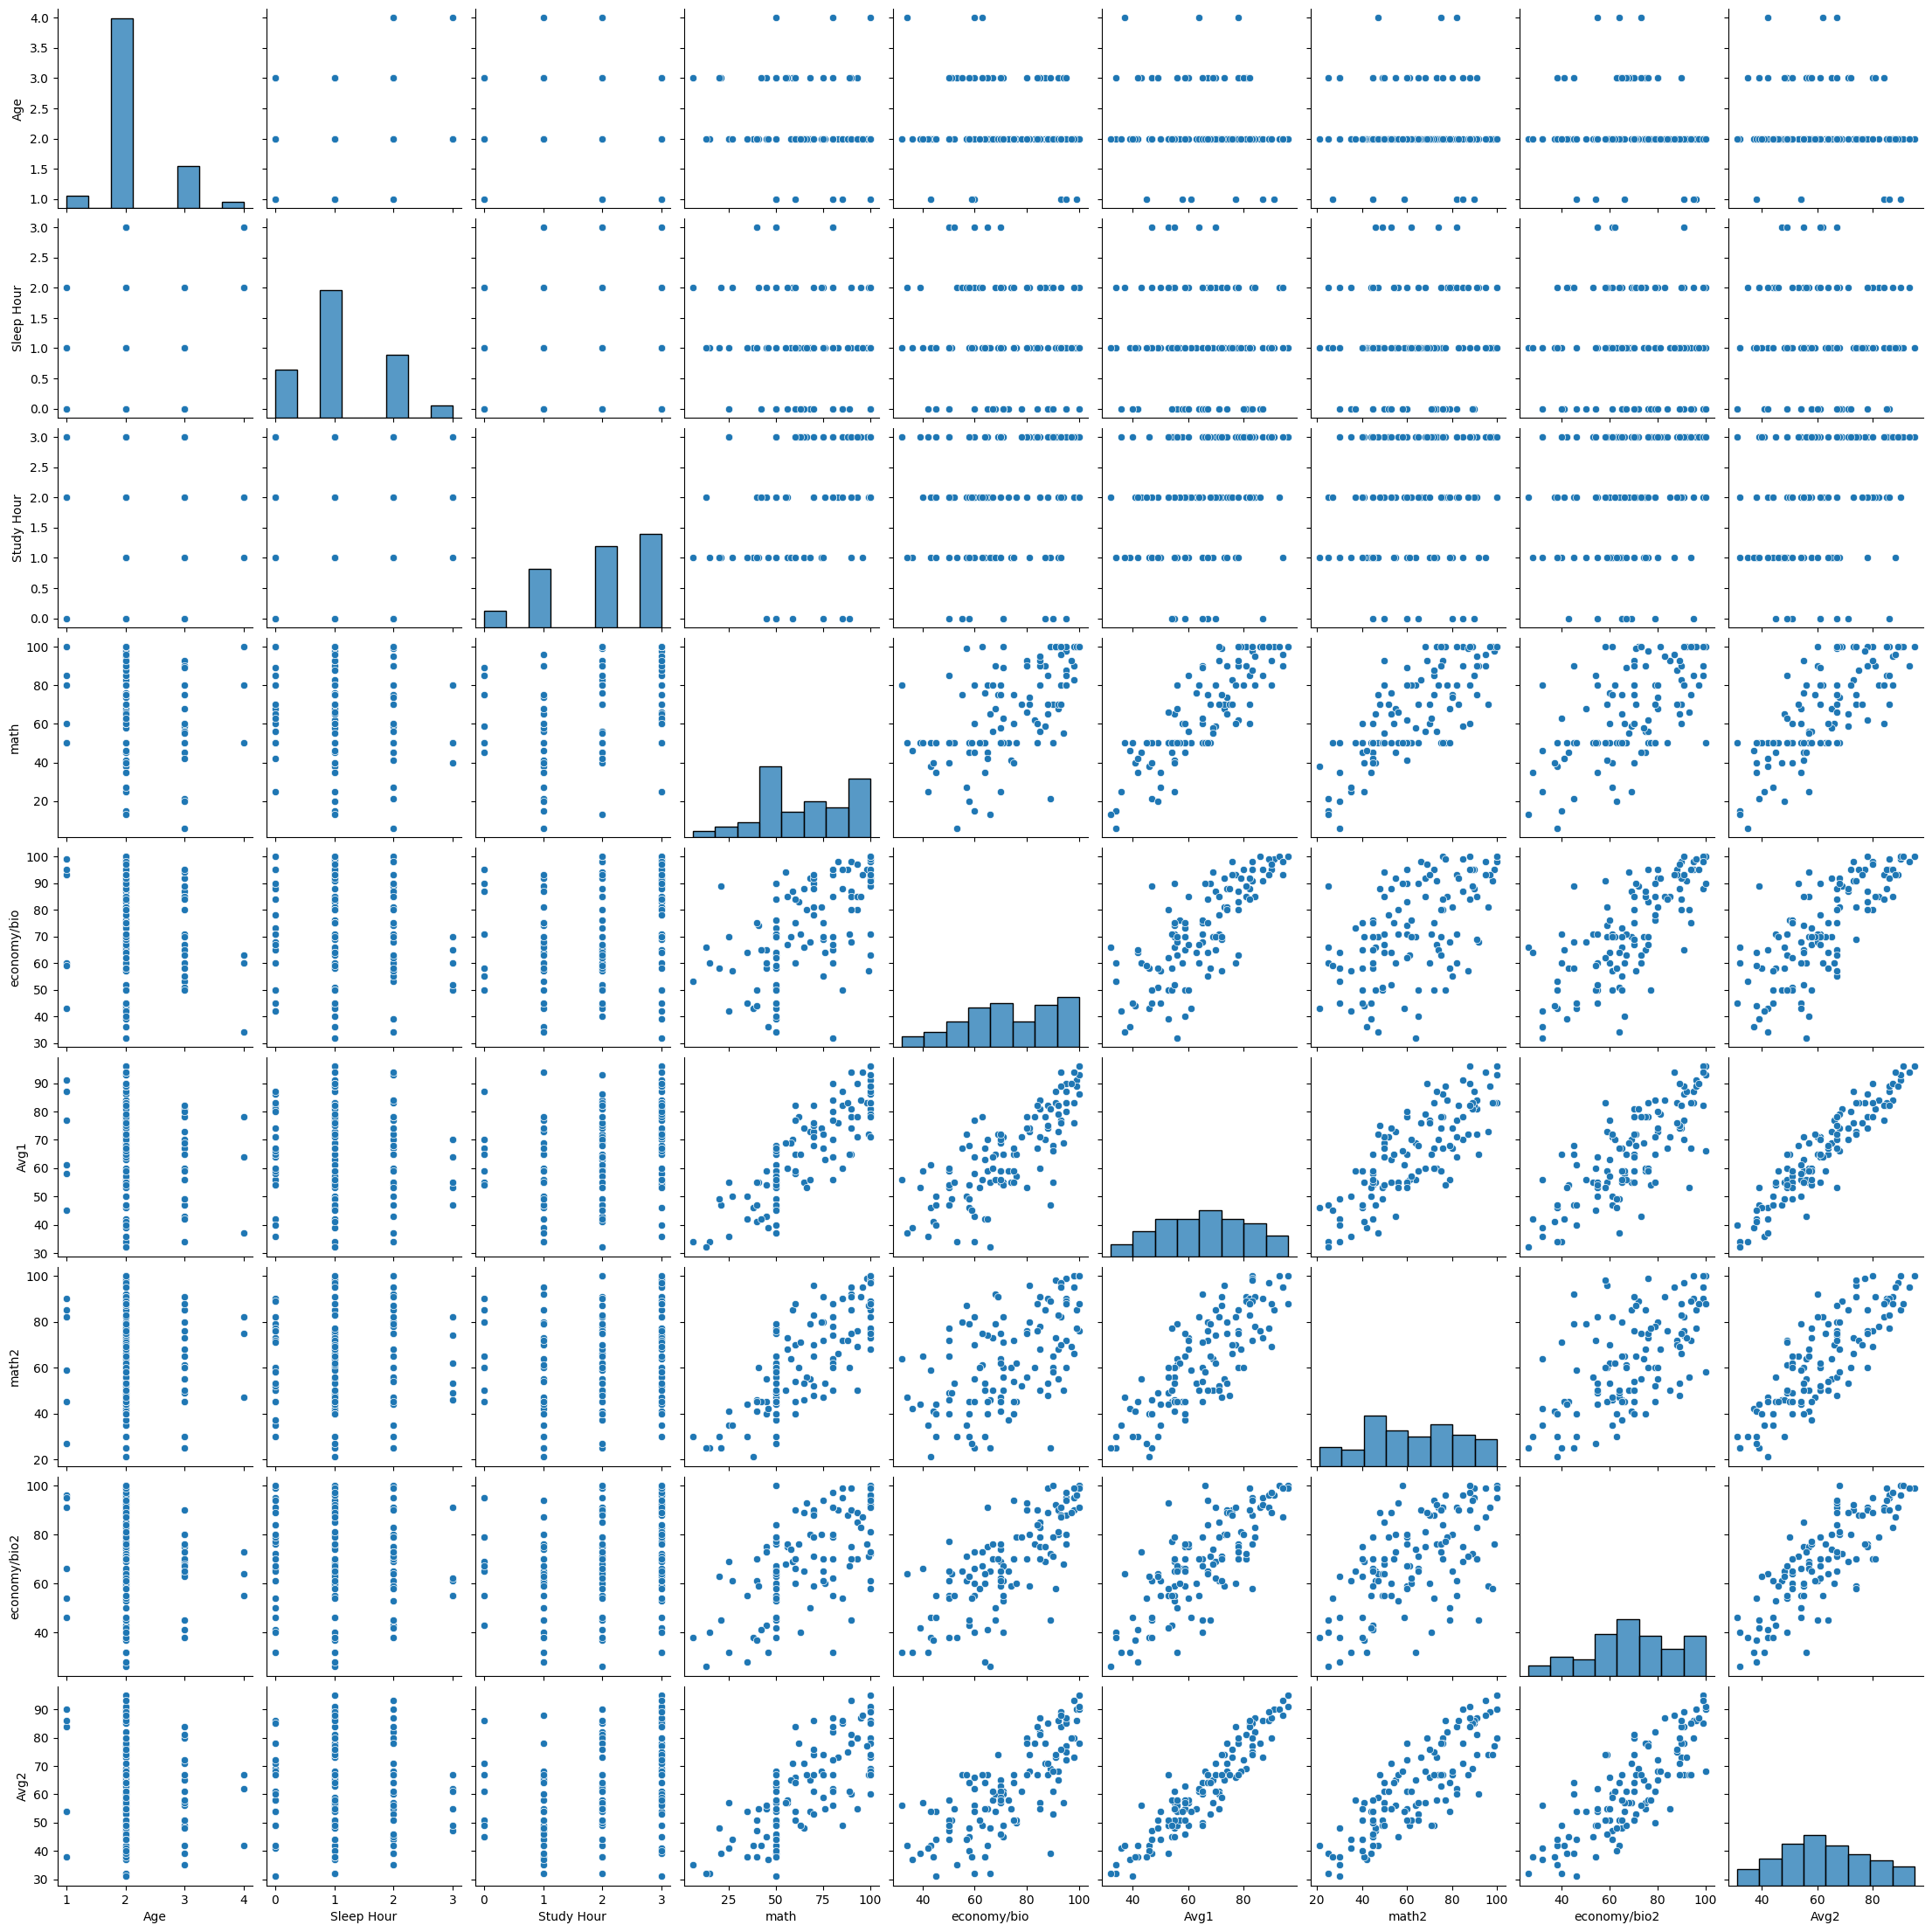

In [ ]:

#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

**OBSERVATION**

From the pair plot above some of the observations are :-  
1. **Avg2:** From the histogram analysis we can see the grades of second semester are zero-skewed. Most of the students scored average around 60.
1. **Avg1:** From the histogram analysis we can see the grades of first semester are zero-skewed. Most of the students scored average around 70.
2. **Study Hour:** Study hour is left-skewed.most students study 3 hours.
3. **Study Hour Avg2:** Students who have higher study hourse scored higher in second semester.

4. **economy/bio and economy/bio2:** most students did better in second semester in this subject.
5. **math and math2:** most students did better in second semester in this subject.



In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       120 non-null    object
 1   Social Status             120 non-null    object
 2   Age                       120 non-null    int64 
 3   Living                    120 non-null    object
 4   Mother education          120 non-null    object
 5   Father education          120 non-null    object
 6   Family Relationship       120 non-null    object
 7   Education Fee             120 non-null    object
 8   Study Room                120 non-null    object
 9   Family Economic Level     120 non-null    object
 10  Specialization            120 non-null    object
 11  Study willing             120 non-null    object
 12  Attendance                120 non-null    object
 13  Higher Education Willing  120 non-null    object
 14  Sleep Hour                

Sex                          3
Social Status                3
Age                          4
Living                       2
Mother education             5
Father education             5
Family Relationship          5
Education Fee                2
Study Room                   2
Family Economic Level        4
Specialization               2
Study willing                2
Attendance                   3
Higher Education Willing     2
Sleep Hour                   4
Study Hour                   4
Transport                    2
Holiday Effect               2
Worry Effect                 2
math                        41
economy/bio                 51
Avg1                        53
math2                       57
economy/bio2                54
Avg2                        55
dtype: int64

In [ ]:
# dropping some more columns for better graph analysis
droped_column_names = [ "Mother education", "Father education", "Education Fee", "Transport", "Family Economic Level", "Sleep Hour"]

df.drop( droped_column_names , axis = 1 ,inplace = True)
df

,Sex,Social Status,Age,Living,Family Relationship,Study Room,Specialization,Study willing,Attendance,Higher Education Willing,Study Hour,Holiday Effect,Worry Effect,math,economy/bio,Avg1,math2,economy/bio2,Avg2
0,Male,single,2,city,excellent,no,APP,yes,vgood,yes,3,yes,no,25,70,55,41,69,57
1,Male,single,3,city,excellent,yes,APP,yes,vgood,no,0,yes,yes,59,87,70,85,69,71
2,Male,single,2,city,good,no,APP,yes,good,no,0,yes,yes,45,58,54,45,43,45
3,Male,coupled,3,city,excellent,yes,APP,no,good,no,1,no,yes,68,92,73,55,80,65
4,Male,single,2,city,excellent,yes,APP,yes,good,yes,1,no,yes,15,60,34,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Female,single,2,city,excellent,no,BIO,yes,good,yes,3,no,yes,93,97,90,69,89,80
116,Female,coupled,3,city,vgood,no,BIO,yes,vgood,yes,3,yes,yes,50,70,56,45,65,58
117,Female,single,2,city,excellent,no,BIO,yes,good,yes,3,yes,yes,50,84,67,76,84,67
118,Female,single,4,city,vgood,no,BIO,yes,good,yes,2,yes,yes,100,63,78,75,73,67


In [ ]:

categorical_columns = ["Sex" , "Social Status" ,"Age" ,"Living" , "Family Relationship", "Specialization", "Study Room", "Study willing", "Attendance", "Higher Education Willing", "Study Hour", "Holiday Effect", "Worry Effect"]
numeric_columns = [ "math" , "math2","economy/bio", "economy/bio2", "Avg1", "Avg2"]

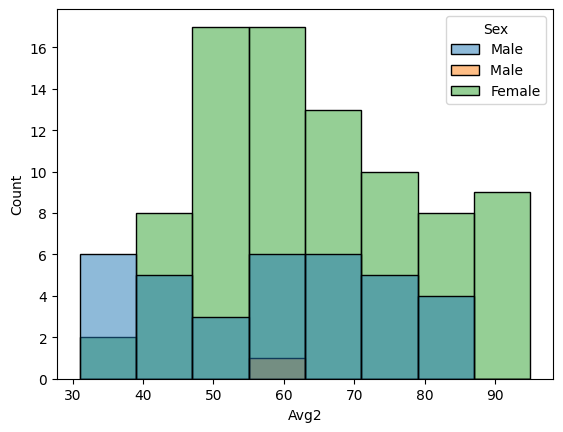

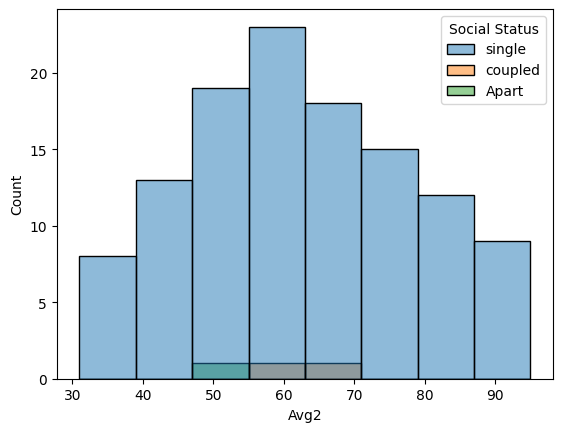

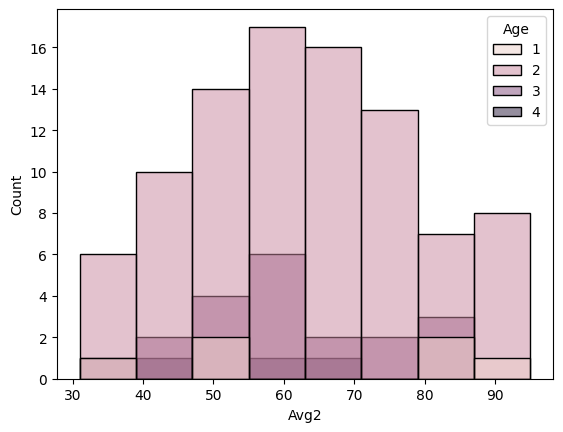

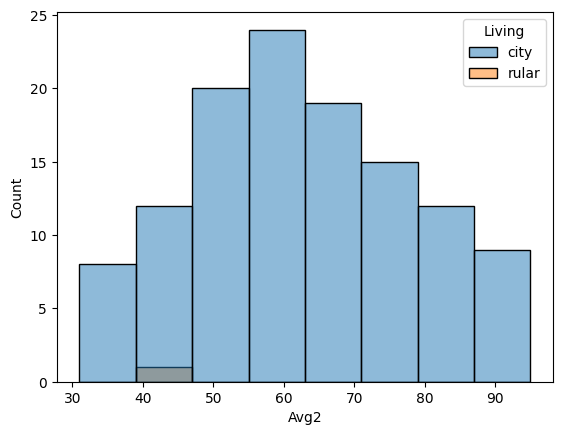

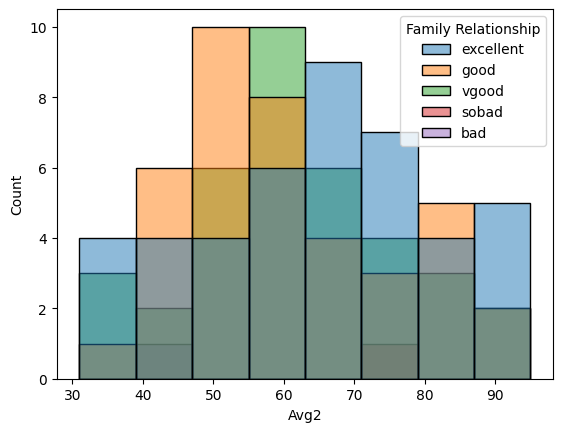

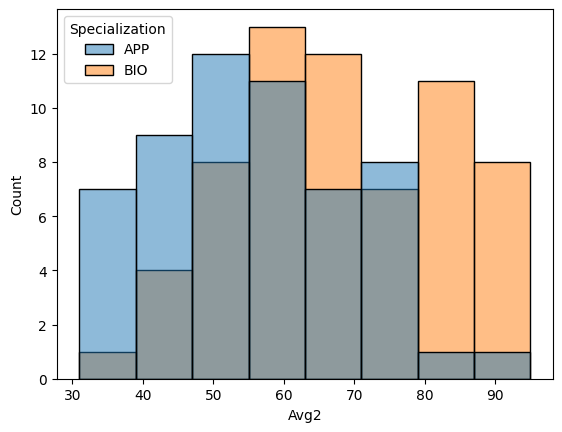

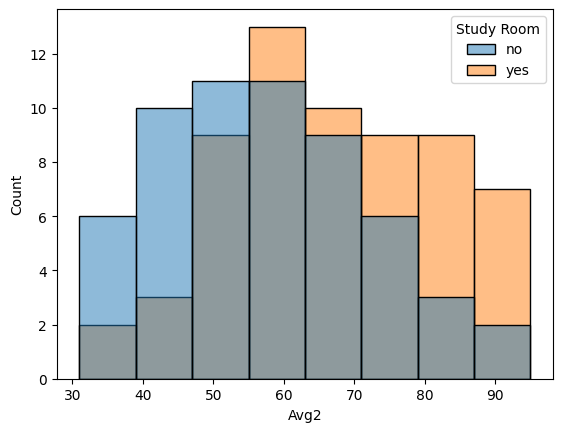

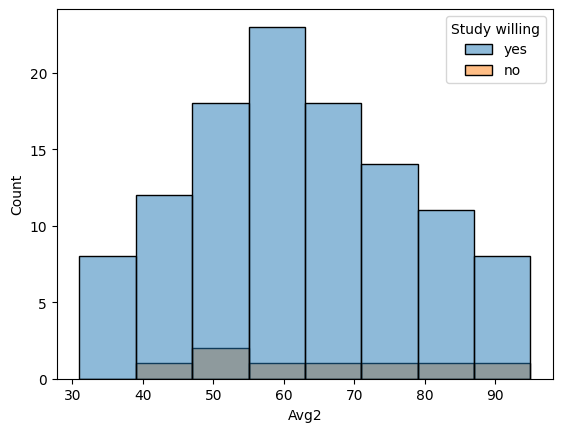

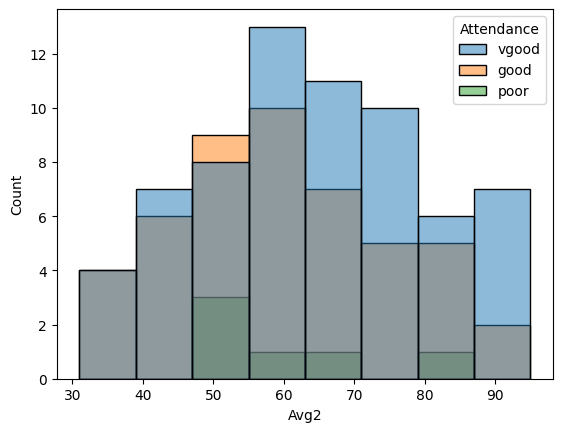

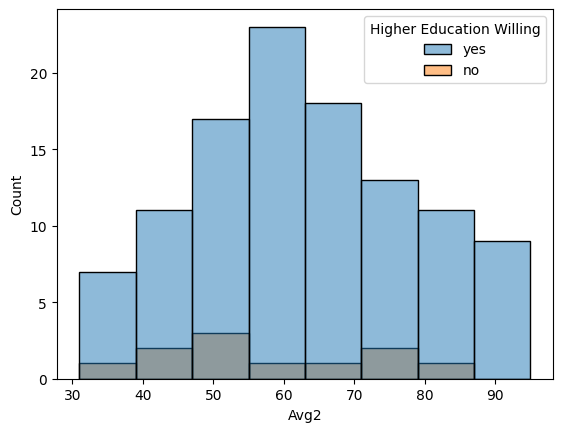

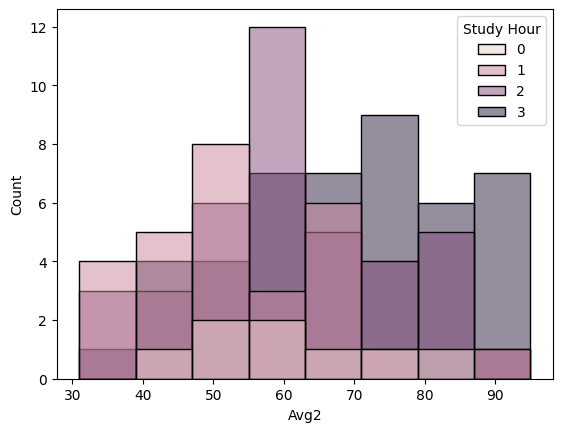

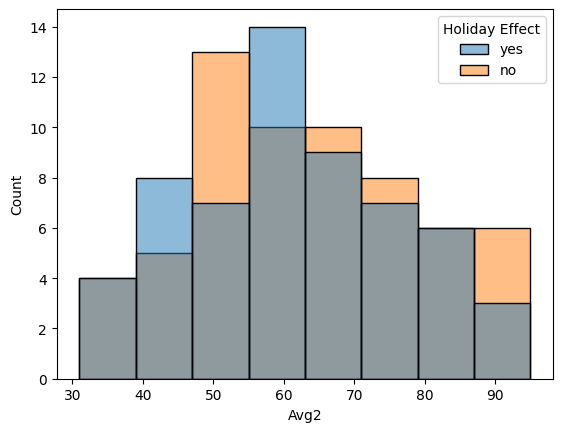

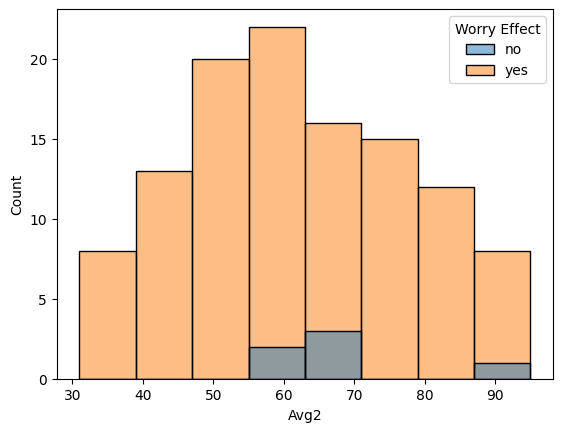

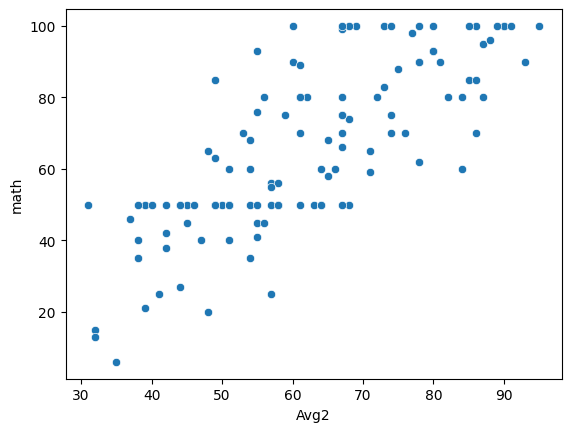

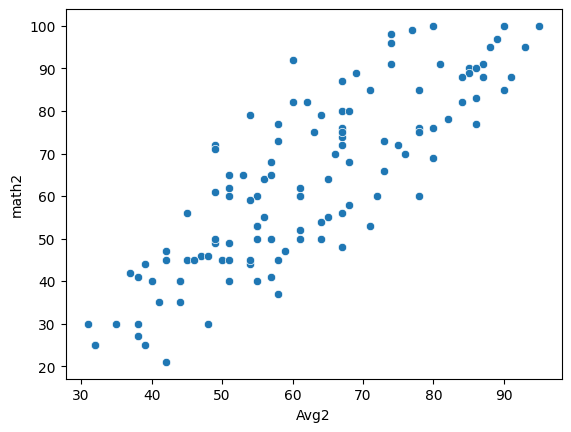

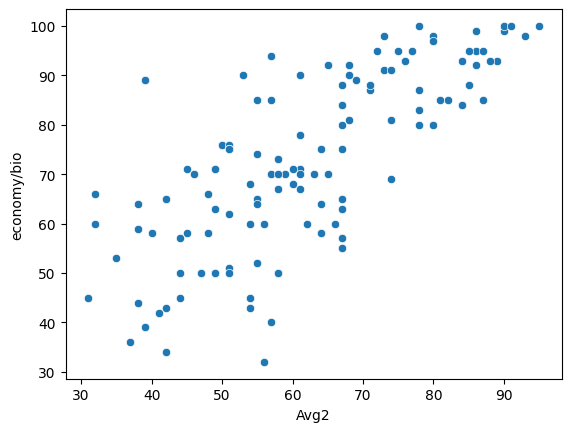

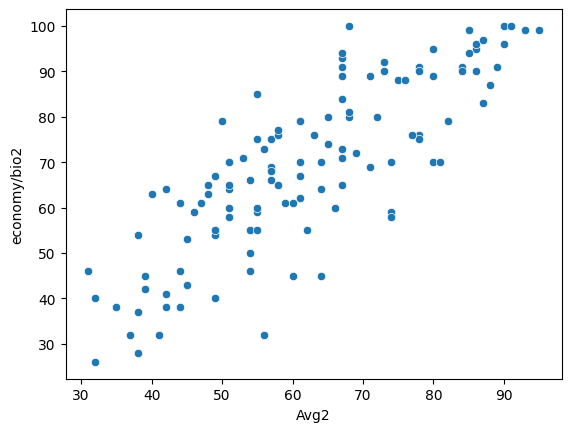

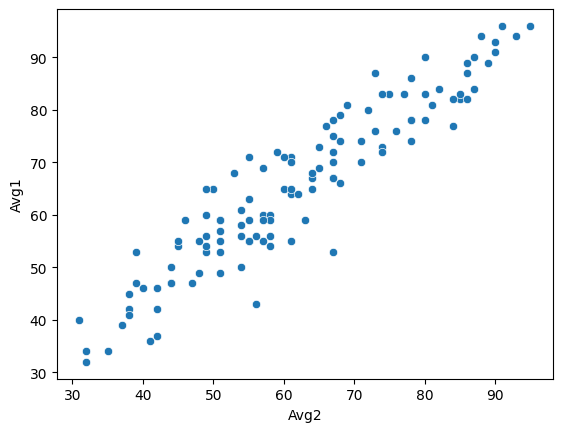

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



**OBSERVATION**

1. Female students scored better. All students who got  around 90 are female.
2. Most students live in the city.
3. Most students who did better than average had a good or excellent relationship with family. Most students who did  worse has good or excellent relation with family
4. Students who have BIO as specialization did better than Who had APP as specialization.
5. Students who have their own study room scored better.
6. The students who study for around 3 hours scored better
7. Worry affected everyone's performance
8 Those who did well in Avg1, did well in Avg2 too. (the scatter points follow a linear line).


In [ ]:
df

,Sex,Social Status,Age,Living,Family Relationship,Study Room,Specialization,Study willing,Attendance,Higher Education Willing,Study Hour,Holiday Effect,Worry Effect,math,economy/bio,Avg1,math2,economy/bio2,Avg2
0,Male,single,2,city,excellent,no,APP,yes,vgood,yes,3,yes,no,25,70,55,41,69,57
1,Male,single,3,city,excellent,yes,APP,yes,vgood,no,0,yes,yes,59,87,70,85,69,71
2,Male,single,2,city,good,no,APP,yes,good,no,0,yes,yes,45,58,54,45,43,45
3,Male,coupled,3,city,excellent,yes,APP,no,good,no,1,no,yes,68,92,73,55,80,65
4,Male,single,2,city,excellent,yes,APP,yes,good,yes,1,no,yes,15,60,34,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Female,single,2,city,excellent,no,BIO,yes,good,yes,3,no,yes,93,97,90,69,89,80
116,Female,coupled,3,city,vgood,no,BIO,yes,vgood,yes,3,yes,yes,50,70,56,45,65,58
117,Female,single,2,city,excellent,no,BIO,yes,good,yes,3,yes,yes,50,84,67,76,84,67
118,Female,single,4,city,vgood,no,BIO,yes,good,yes,2,yes,yes,100,63,78,75,73,67


In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)
  plt.show()

**OBSERVATION**

target_column_name is not a categorical variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       120 non-null    object
 1   Social Status             120 non-null    object
 2   Age                       120 non-null    int64 
 3   Living                    120 non-null    object
 4   Family Relationship       120 non-null    object
 5   Study Room                120 non-null    object
 6   Specialization            120 non-null    object
 7   Study willing             120 non-null    object
 8   Attendance                120 non-null    object
 9   Higher Education Willing  120 non-null    object
 10  Study Hour                120 non-null    int64 
 11  Holiday Effect            120 non-null    object
 12  Worry Effect              120 non-null    object
 13  math                      120 non-null    int64 
 14  economy/bio               

<Axes: >

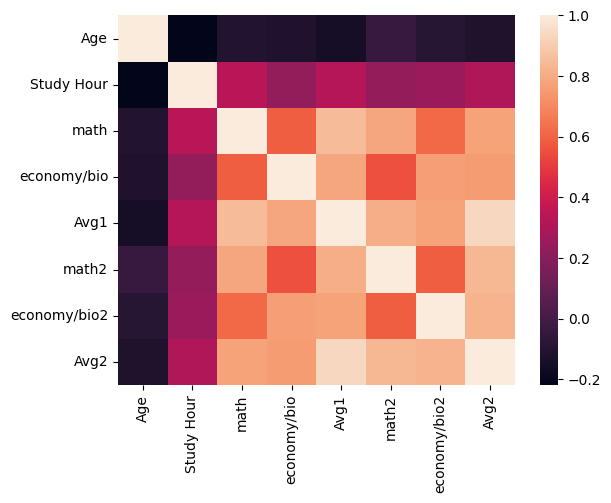

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

**OBSERVATION**


1. A strong positive correlation has been observed between the "Age" and "Avg2" columns. The older you are the higher chances you score well in Avg2.

2. The column 'Avg2'and 'Study Hour' has strong positive correlation. So, more you study, you score better.






In [ ]:
#svm

Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:

X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

You Need to use Linear Regression as your target column in Numeric


In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

You Need to use Linear Regression as your target column in Numeric


In [ ]:
#Linear Regression

In [ ]:
df

,Student_ID,Sex,Social Status,Age,Governorate,Living,Mother education,Father education,Family member Education,Father Alive,...,economy/bio,Avg1,Islamea2,arabic2,english2,math2,physics2,chemistry2,economy/bio2,Avg2
0,1,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,70,55,69,50,60,41,59,50,69,57
1,2,Male,single,3,baghdad,city,medium,higher,yes,yes,...,87,70,65,87,68,85,64,61,69,71
2,3,Male,single,2,baghdad,city,Illiterate,secondary,no,yes,...,58,54,44,50,46,45,55,30,43,45
3,4,Male,coupled,3,baghdad,city,ba,ba,yes,yes,...,92,73,60,55,60,55,70,73,80,65
4,5,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,60,34,40,32,28,25,35,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Female,single,2,baghdad,city,medium,secondary,yes,yes,...,97,90,75,75,89,69,75,86,89,80
116,117,Female,coupled,3,baghdad,city,medium,ba,yes,yes,...,70,56,65,65,80,45,39,49,65,58
117,118,Female,single,2,baghdad,city,medium,medium,no,no,...,84,67,54,69,74,76,69,40,84,67
118,119,Female,single,4,other,city,medium,secondary,yes,yes,...,63,78,63,61,63,75,69,67,73,67


In [ ]:
X = df[['Study Hour']]
y = df[['Avg2']]

print(X)
print(y)

     Study Hour
0             3
1             0
2             0
3             1
4             1
..          ...
115           3
116           3
117           3
118           2
119           1

[120 rows x 1 columns]
     Avg2
0      57
1      71
2      45
3      65
4      32
..    ...
115    80
116    58
117    67
118    67
119    88

[120 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Study Hour
6             2
75            3
100           2
91            3
104           3
..          ...
67            2
64            1
117           3
47            3
44            3

[84 rows x 1 columns]
     Avg2
6      55
75     74
100    51
91     74
104    72
..    ...
67     51
64     49
117    67
47     58
44     39

[84 rows x 1 columns]
     Study Hour
48            3
94            2
95            3
8             2
97            2
22            1
7             3
10            1
45            3
89            3
33            2
50            2
2             0
60            2
119           1
74            3
30            1
43            2
111           3
76            3
63            3
59            3
16            3
24            1
110           2
13            2
54            2
93            3
26            3
68            3
51            3
113           0
107           2
61            2
3             1
96            3
     Avg2
48     69
94     78
95     95
8      32


In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting the values of the Test Set

y_pred = regressor.predict(X_test)
print(y_pred)

[[66.90262948]
 [61.64621514]
 [66.90262948]
 [61.64621514]
 [61.64621514]
 [56.3898008 ]
 [66.90262948]
 [56.3898008 ]
 [66.90262948]
 [66.90262948]
 [61.64621514]
 [61.64621514]
 [51.13338645]
 [61.64621514]
 [56.3898008 ]
 [66.90262948]
 [56.3898008 ]
 [61.64621514]
 [66.90262948]
 [66.90262948]
 [66.90262948]
 [66.90262948]
 [66.90262948]
 [56.3898008 ]
 [61.64621514]
 [61.64621514]
 [61.64621514]
 [66.90262948]
 [66.90262948]
 [66.90262948]
 [66.90262948]
 [51.13338645]
 [61.64621514]
 [61.64621514]
 [56.3898008 ]
 [66.90262948]]


In [ ]:
print(regressor.coef_)

print(regressor.intercept_)

[[5.25641434]]
[51.13338645]


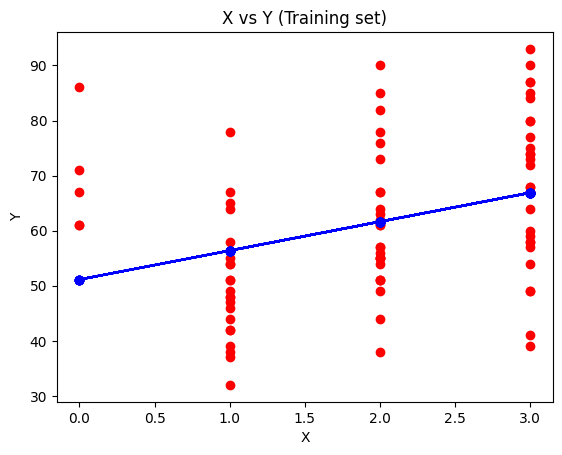

In [ ]:
# Visualizing the Correlation

plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('X vs Y (Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

313.04011389237206

**Observation**

The model trying to predict Avg2 based on study hour. The MSE value indicates the average squared error of your model’s predictions. for a small number like Avg2, MSE of 313.04 might not be quite good.